In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import random
xtrain=pd.read_csv(r"C:\Users\Aditya Gaitonde\Downloads\iris_train.csv")
xtest = pd.read_csv(r"C:\Users\Aditya Gaitonde\Downloads\iris_test.csv")
xtrain['label'] = xtrain["label"].apply(lambda x: 1 if x ==2 else 0)
xtrain

,f1,f2,f3,f4,label
0,6.3,2.9,5.6,1.8,1
1,6.4,2.8,5.6,2.1,1
2,5.5,2.6,4.4,1.2,1
3,5.7,2.9,4.2,1.3,1
4,6.9,3.2,5.7,2.3,1
...,...,...,...,...,...
115,7.7,3.8,6.7,2.2,1
116,6.5,2.8,4.6,1.5,1
117,4.8,3.0,1.4,0.1,0
118,5.6,3.0,4.1,1.3,1


In [14]:
#initialization
input_units=4
hidden_units=2
output_units=1
b1=np.random.rand(hidden_units).reshape(hidden_units,1)
b2=np.random.rand(output_units).reshape(output_units,1)
w_in=np.random.rand(input_units, hidden_units)
w_output=np.random.rand(hidden_units,output_units)
print(w_in)

[[0.04897604 0.00347445]
 [0.57637613 0.70769554]
 [0.78708626 0.95260101]
 [0.87824225 0.67453757]]


In [15]:
data_order=np.arange(0,len(xtrain))
np.random.shuffle(data_order)
data_order

array([ 49, 112,  70,  62,  92, 114, 106,  91,  71,   4,  44,  85,  18,
        61,  32,   7,  74,  68,   3,   1,  63, 101,  45,  17, 113,  14,
        58, 107, 119,  46,  19,  90,  69, 105,  72,  66,  43,  52,  95,
        26,   2,   9, 115,  67, 110,  25,  13,  64, 102,   5,  41,  29,
        21,  83,  81,  12,  98,  30,  79,  82,  48,  20,  89, 117,  15,
        99,  55,  28,  33,   6, 104,  93,  76,  57,  35, 116,  36,  47,
        10,  60,  34, 100,  84,  37,  38,   0,  40,  86,  94,  50,  59,
       118,  22,  11,  42,  75,  31,  65,  97,  51,  96,  56,  16,  77,
        88, 109, 103,  87,  53, 108,  78,  27,  73,  24, 111,  80,   8,
        39,  23,  54])

In [16]:
def logis(x):
  return 1/(1+np.exp(-x))
def relu(x):
  return np.maximum(0,x)
def d_relu(x):
  if x>0:
    return 1
  return 0

[[ 0.27222261 -1.07710083]
 [ 0.73086766 -1.16785068]
 [ 0.84518298  2.76114765]
 [ 0.88656357  1.52292308]]
[[-1.70343622]
 [ 6.76063933]]
45


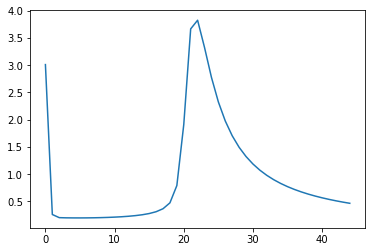

In [25]:
l_rate=0.05
n_epochs=45
act_choice=[logis,relu]
#change activation choice as act_choice[0] or act_choice[1]
act_hide_chosen=act_choice[0]
diff1=[]
i=0
while i<=n_epochs-1:
    t=0
    error_sum=0 #used for error plot 
    while t<=len(data_order)-1:
        idata=np.array(xtrain.iloc[data_order[t]]).reshape(5,1)
        x_i=idata[:4]
        y_label=idata[4:]
          #feedforward
        net=b1 +np.dot(w_in.T,x_i)
        act_hide=np.vectorize(act_hide_chosen)
        z_i=act_hide(net)
        net0=b2+np.dot(w_output.T,z_i)
        act_out=np.vectorize(logis)
        o_i=act_out(net0)[0][0] #ignore next 3 lines it was for checking error plot
        a=o_i-y_label
        error_sum=error_sum+a[0][0]
      #backprop
      #gradients
        de=o_i*(1-o_i)*(o_i-y_label)/(o_i*(1-o_i))
        if act_hide_chosen==logis:  
            dh=np.multiply(np.multiply(z_i,1-z_i),w_output)*de
        else:
            diff=np.vectorize(d_relu)
            diff_term=diff(net)
            dh=np.multiply(w_output,diff_term)*de
    #update bias vectors
        del_out=de
        del_hide=dh
        b2=b2-l_rate*del_out
        b1=b1-l_rate*del_hide
      #update weight matrix
        del_w=z_i*de
        hide_del_w=np.dot(x_i,dh.T)
        w_output=w_output-l_rate*del_w
        w_in=w_in-l_rate*hide_del_w
        t=t+1
    diff1.append(error_sum)
    i=i+1
print(w_in)
print(w_output)
print(len(diff1))
plt.plot(np.arange(0,n_epochs).reshape(n_epochs,1),np.array(diff1).reshape(n_epochs,1))

In [26]:
xtest
ypred=[]
i=0
while i<=len(xtest)-1:
    idata=np.array(xtest.iloc[i]).reshape(5,1)
    ixtest=idata[:4]
  #feedforward
    net=b1 +np.dot(w_in.T,ixtest)
    act_hide=np.vectorize(act_hide_chosen)
    z_i=act_hide(net)
    net0=b2+np.dot(w_output.T,z_i)
    act_out=np.vectorize(logis)
    if act_out(net0)[0][0]>=0.5:
        ypred.append(1)
    else:
        ypred.append(0)
    i=i+1
ypred

[1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1]

In [19]:
ytest=xtest["label"]
xtest["label"] = xtest["label"].apply(lambda x: 1 if x ==2 else 0)
ydata=list(xtest["label"])

In [20]:
conmat={"TP":0,"TN":0,"FP":0,"FN":0}
print(len(ydata))
for i in range(len(ydata)):
  if ydata[i]==ypred[i]==1:
    conmat["TP"]=conmat["TP"]+1
  elif ydata[i]==ypred[i]==0:
    conmat["TN"]=conmat["TN"]+1
  elif ydata[i]==1 and ypred[i]==0:
    conmat["FN"]=conmat["FN"]+1
  else:
    conmat["FP"]=conmat["FP"]+1
conmat

30


{'TP': 20, 'TN': 0, 'FP': 10, 'FN': 0}

In [21]:
acc=(conmat["TP"] + conmat["TN"])/(conmat["TP"] + conmat["TN"]+conmat["FP"]+conmat["FN"])
pres=(conmat["TP"])/(conmat["TP"] +conmat["FP"])
recall=(conmat["TP"])/(conmat["TP"] +conmat["FN"])
f1=(2*pres*recall)/(pres+recall)
recall

1.0

In [22]:
acc

0.6666666666666666

In [23]:
pres

0.6666666666666666

In [24]:
f1

0.8